<a href="https://colab.research.google.com/github/kug4586/I_m_learing_ML/blob/main/1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/learning_ML/math_for_deep

/content/drive/MyDrive/Colab_Notebooks/learning_ML/math_for_deep


In [3]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터셋 전처리

<보스턴 하우징 데이터셋>

---

- price (부동산 가격(평균)) ★
- rm (객실 수(평균)) ★
- age (1940년 이전에 지어진 주택의 비율)

---

- lstat (저소득층 비율) ★
- crim (범죄율)
- chas (찰스 강변 여부)

---

★은 사용할 데이터를 말함

In [19]:
# 학습용 데이터 준비
from sklearn.datasets import load_boston
boston = load_boston()
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names

print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ', feature_names)

# RM 데이터
x_data = x_org[:,feature_names == 'RM']
print('RM 데이터', x_data.shape)

# 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis=1)
print('더미 변수 추가 후의 RM 데이터', x.shape)

원본 데이터 (506, 13) (506,)
항목 이름:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [ ]:
# 정답값 yt를 표시
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


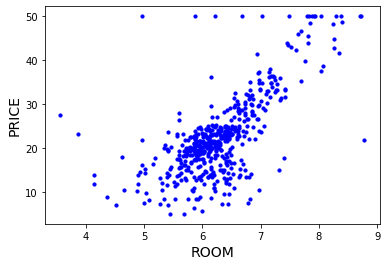

In [ ]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

## 2. 단일회귀 모델 정의 & 훈련

In [16]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
def pred(x, w):
    return(x @ w) # @ = 내적

In [ ]:
# 초기 설정

# 데이터 전체 개수
M = x.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [ ]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 100 loss = 29.617518
iter = 200 loss = 29.431766
iter = 300 loss = 29.250428
iter = 400 loss = 29.073399
iter = 500 loss = 28.900577
iter = 600 loss = 28.731861
iter = 700 loss = 28.567154
iter = 800 loss = 28.406360
iter = 900 loss = 28.249388
iter = 1000 loss = 28.096145
iter = 1100 loss = 27.946544
iter = 1200 loss = 27.800498
iter = 1300 loss = 27.657922
iter = 1400 loss = 27.518733
iter = 1500 loss = 27.382852
iter = 1600 loss = 27.250200
iter = 1700 loss = 27.120700
iter = 1800 loss = 26.994277
iter = 1900 loss = 26.870858
iter = 2000 loss = 26.750372
iter = 2100 loss = 26.632749
iter = 2200 loss = 26.517921
iter = 2300 loss = 26.405821
iter = 2400 loss = 26.296385
iter = 2500 loss = 26.189549
iter = 2600 loss = 26.085252
iter = 2700 loss = 25.983433
iter = 2800 loss = 25.884034
iter = 2900 loss = 25.786997
iter = 3000 loss = 25.692265
iter = 3100 loss = 25.599784
iter = 3200 loss = 25.509501
iter = 3300 loss = 25.421363
iter = 3400 loss = 25.335

In [ ]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [ ]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

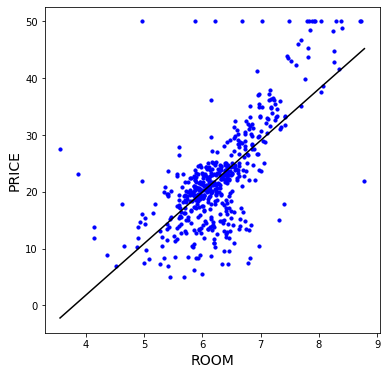

In [ ]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

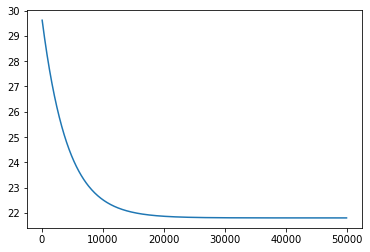

In [ ]:
# 학습 곡선을 표시 (첫 1개분 제외)
plt.plot(history[1:,0], history[1:,1])
plt.show()

In [ ]:
# 예측하기
import random
n = random.randrange(0, 506)
yp = pred(x[n], w)
print('예측한 가격: %f' % yp)
print('실제 가격: %f' % yt[n])

예측한 가격: 24.136719
실제 가격: 9.600000


## 3. 다중회귀 모델 정의 & 훈련

In [20]:
# 열(LSTAT: 저소득층 비율) 추가
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print('LSTAT를 추가한 데이터셋의 모양: {}'.format(x2.shape))

LSTAT를 추가한 데이터셋의 모양: (506, 3)


In [21]:
# 입력 데이터 x 표시(더미 데이터 포함)
print(x2[:5, :])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [23]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
def pred(x, w):
    return(x @ w) # @ = 내적

In [42]:
# 초기 설정

# 데이터 전체 개수
M = x2.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x2.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w2 = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [30]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w2)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w2 = w2 - alpha * (x2.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 3753823486849646657661191585792.000000
iter = 200 loss = 2655334090092121273125402130921363327346591043573060835737600.000000
iter = 300 loss = 1878297995285461085045523284196482247086583201277085616612002646578050704876245186403893248.000000
iter = 400 loss = 1328647635059370371481703736763320157491450137821164352493234234699501961915925811873201177774480485596734461998977253376.000000
iter = 500 loss = 939842635502889662770612459069204655322935013749983559305346547831066121187997098891801614859352058834834127179648062098892108735689096962423654449152.000000
iter = 600 loss = 664814474659069633326225154456281621437843401089919849984802605951952813450932070104832955931408232444704376327323598259772619705292304255008658261182054817148272715437536805126144.000000
iter = 700 loss = 470268392835489012233685972589819183228214372013923782533073066974686786494923912473590265792480648724358954282601835762516495342680861832763187338192479316159724381

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


iter = 14700 loss = nan
iter = 14800 loss = nan
iter = 14900 loss = nan
iter = 15000 loss = nan
iter = 15100 loss = nan
iter = 15200 loss = nan
iter = 15300 loss = nan
iter = 15400 loss = nan
iter = 15500 loss = nan
iter = 15600 loss = nan
iter = 15700 loss = nan
iter = 15800 loss = nan
iter = 15900 loss = nan
iter = 16000 loss = nan
iter = 16100 loss = nan
iter = 16200 loss = nan
iter = 16300 loss = nan
iter = 16400 loss = nan
iter = 16500 loss = nan
iter = 16600 loss = nan
iter = 16700 loss = nan
iter = 16800 loss = nan
iter = 16900 loss = nan
iter = 17000 loss = nan
iter = 17100 loss = nan
iter = 17200 loss = nan
iter = 17300 loss = nan
iter = 17400 loss = nan
iter = 17500 loss = nan
iter = 17600 loss = nan
iter = 17700 loss = nan
iter = 17800 loss = nan
iter = 17900 loss = nan
iter = 18000 loss = nan
iter = 18100 loss = nan
iter = 18200 loss = nan
iter = 18300 loss = nan
iter = 18400 loss = nan
iter = 18500 loss = nan
iter = 18600 loss = nan
iter = 18700 loss = nan
iter = 18800 los

In [43]:
# 위의 계산을 실행하면 손실함수가 수렴하지 않는다.
# 이는 새로운 변수가 추가됐기 때문으로, 학습률을 바꾸면 괜찮아진다.
iters = 2000
alpha = 0.001
w2 = np.ones(D)
history = np.zeros((0,2))

In [44]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w2)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w2 = w2 - alpha * (x2.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 25.358934
iter = 200 loss = 16.391055
iter = 300 loss = 15.403015
iter = 400 loss = 15.294135
iter = 500 loss = 15.282114
iter = 600 loss = 15.280764
iter = 700 loss = 15.280589
iter = 800 loss = 15.280544
iter = 900 loss = 15.280514
iter = 1000 loss = 15.280485
iter = 1100 loss = 15.280456
iter = 1200 loss = 15.280428
iter = 1300 loss = 15.280399
iter = 1400 loss = 15.280371
iter = 1500 loss = 15.280342
iter = 1600 loss = 15.280314
iter = 1700 loss = 15.280285
iter = 1800 loss = 15.280257
iter = 1900 loss = 15.280228


In [45]:
# 최종 손실함수 초깃값과 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('신실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
신실함수 최종값: 15.280228


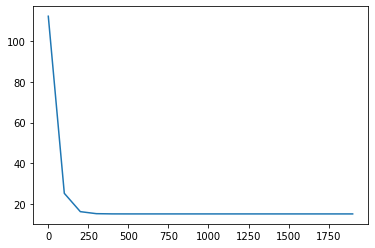

In [47]:
# 학습 곡선의 표시 (처음 10개분 제외)
plt.plot(history[:, 0], history[:, 1])
plt.show()